Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("heart_dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
#Since there is no missing values, neither encoding categorical variables, and scaling the numerical features is required.

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [15]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [20]:
X_test.shape

(91, 13)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)

In [22]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [23]:
y_pred_test = rfc.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(f"accuracy: {accuracy_score(y_pred_test,y_test)}")
print(f"confusion matrix :{confusion_matrix(y_pred_test,y_test)}")
print(f"classification report: {classification_report(y_pred_test,y_test)}")

accuracy: 0.8241758241758241
confusion matrix :[[32  7]
 [ 9 43]]
classification report:               precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.86      0.83      0.84        52

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [30]:
feature_importance =rfc.feature_importances_

In [31]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

In [34]:
feature_importance_df=feature_importance_df.sort_values(by='Importance', ascending=False)

In [37]:
top_feature = feature_importance_df.head(5)

In [38]:
top_feature

,Feature,Importance
11,ca,0.143612
7,thalach,0.113091
12,thal,0.112357
2,cp,0.106813
9,oldpeak,0.106034


Text(0.5, 1.0, 'top 5 most important features in predicting heart disease risk')

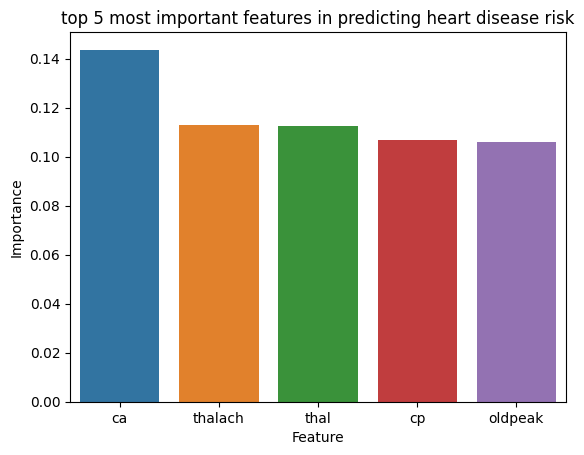

In [46]:
sns.barplot(x = top_feature['Feature'], y = top_feature['Importance'] )
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('top 5 most important features in predicting heart disease risk')

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [47]:
from sklearn.model_selection import GridSearchCV


In [51]:
parameter = {'n_estimators': [10,100,200],
              'criterion': ['gini', 'entropy', 'log_loss'],
             'max_depth': [5,10,15],
             'min_samples_split': [1,2,3],
             'min_samples_leaf': [1,2,3]
             }

In [52]:
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameter,cv=5,refit =True,scoring='accuracy', verbose=3)

In [53]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=g

[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.810 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.881 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samp

[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.814 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.714 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.860 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.738 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_sam

[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.837 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, 

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.929 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.833 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.738 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=3,

[CV 1/5] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.814 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=15, min_samples_leaf=2,

[CV 3/5] END criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.714 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.905 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=15, min_samples_leaf=3,

[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.814 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=5, min

[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.738 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.929 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.714 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.690 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=5, min

[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.714 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.714 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=1

[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.714 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.881 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.738 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.860 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth

[CV 4/5] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.810 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=1

[CV 1/5] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.786 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.837 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth

[CV 5/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.690 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.690 total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.5s
[CV 2/5] END criterion=log_loss, max_depth

[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.929 total time=   0.2s
[CV 5/5] END criterion=log_loss, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.738 total time=   0.2s
[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.907 total time=   0.5s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.814 total time=   0.5s
[CV 3/5] END criterion=log_loss, max_dept

[CV 5/5] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.3s
[CV 4/5] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.881 total time=   0.2s
[CV 5/5] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 1/5] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END criterion=log_loss, ma

[CV 1/5] END criterion=log_loss, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.738 total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.929 total time=   0.3s
[CV 5/5] END criterion=log_loss, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.786 total time=   0.2s
[CV 1/5] END criterion=log_loss, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END criterion=log_loss, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.837 total time=   0.5s
[CV 3/5] END criterion=log_loss, m

[CV 5/5] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.714 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.907 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.929 total time=   0.2s
[CV 5/5] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 1/5] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END criterion=log_loss, ma

[CV 1/5] END criterion=log_loss, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.881 total time=   0.2s
[CV 5/5] END criterion=log_loss, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.786 total time=   0.2s
[CV 1/5] END criterion=log_loss, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END criterion=log_loss, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.837 total time=   0.5s
[CV 3/5] END criterion=log_loss, m

C:\Users\Suraj Mishra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Suraj Mishra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Suraj Mishra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Suraj Mishra\AppData\Local\Programs\Python\Python310

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy', verbose=3)

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [54]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [56]:
rfc_gs = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100)

In [57]:
rfc_gs.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=3)

In [58]:
y_pred_gs = rfc_gs.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(f"accuracy: {accuracy_score(y_pred_gs,y_test)}")
print(f"confusion matrix :{confusion_matrix(y_pred_gs,y_test)}")
print(f"classification report: {classification_report(y_pred_gs,y_test)}")

accuracy: 0.8241758241758241
confusion matrix :[[32  7]
 [ 9 43]]
classification report:               precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.86      0.83      0.84        52

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [60]:
#Tuned Model and Default model performing same because of best parameters in tune models arrived is same as default model itself.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [65]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [66]:
from matplotlib.colors import ListedColormap

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict for each point in the meshgrid
Z = rfc_gs.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot
plt.figure(figsize=(10, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()

C:\Users\Suraj Mishra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but RandomForestClassifier is expecting 13 features as input.